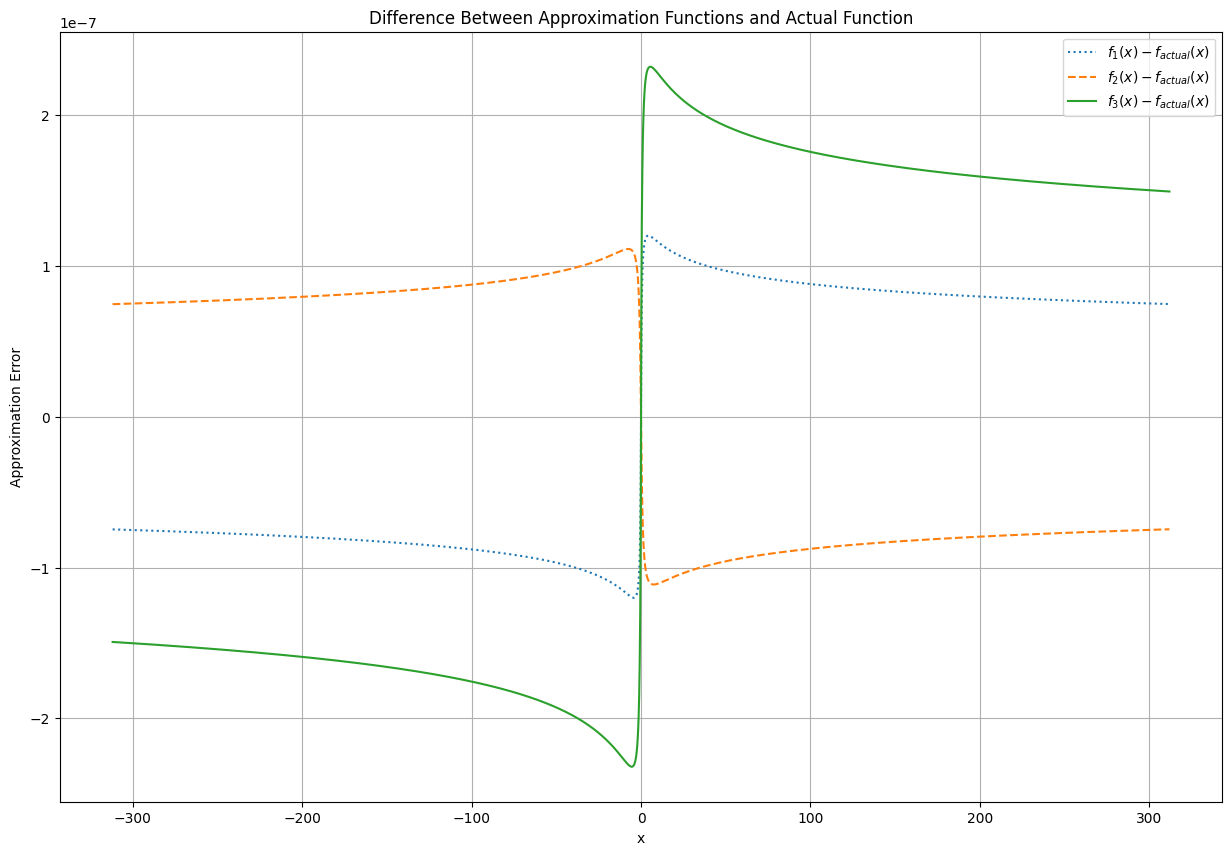

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852 * (0.001**1.852)

# Define the approximation functions
def f_1(x, p):
    return (0.001**1.852) * x * (np.abs(x) + 1000 * p)**0.852 - (0.002368316 * p * x) / (np.abs(x) + 1000 * p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + 1000 * p)**0.852 * (np.abs(x) * (0.001**1.852)) / (np.abs(x) + 852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.175255362 * p**2 * x) / (np.abs(x) + 1000 * p)**1.148

# Generate x values
x_values = np.linspace(-312, 312, 2000)
p = 1e-3  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = f_1_values - f_actual_values
diff_2 = f_2_values - f_actual_values
diff_3 = f_3_values - f_actual_values

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid')

# Use symmetric log scale for better visualization
#plt.xscale('symlog', lint hresh=1e-0)
#plt.yscale('symlog', linthresh=1e-0)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

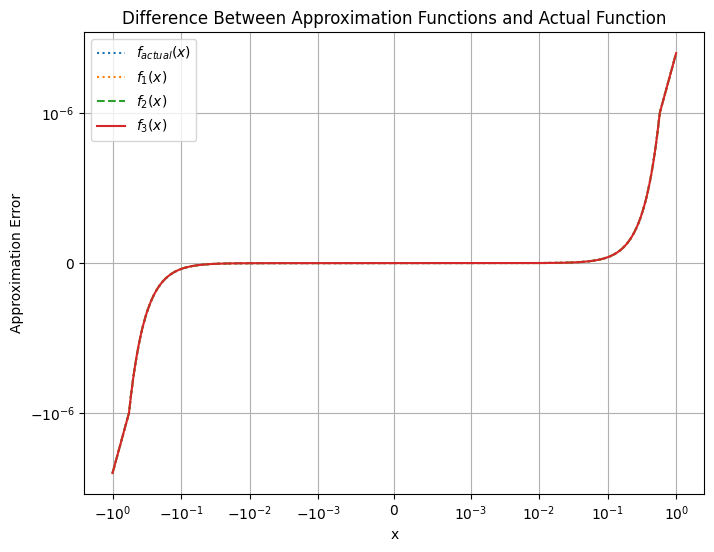

In [8]:

diff_1 = f_1_values  
diff_2 = f_2_values 
diff_3 = f_3_values


# Plot the differences
plt.figure(figsize=(8, 6))
plt.plot(x_values, f_actual_values, label=r'$f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_1, label=r'$f_1(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x)$', linestyle='solid')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-3)
plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


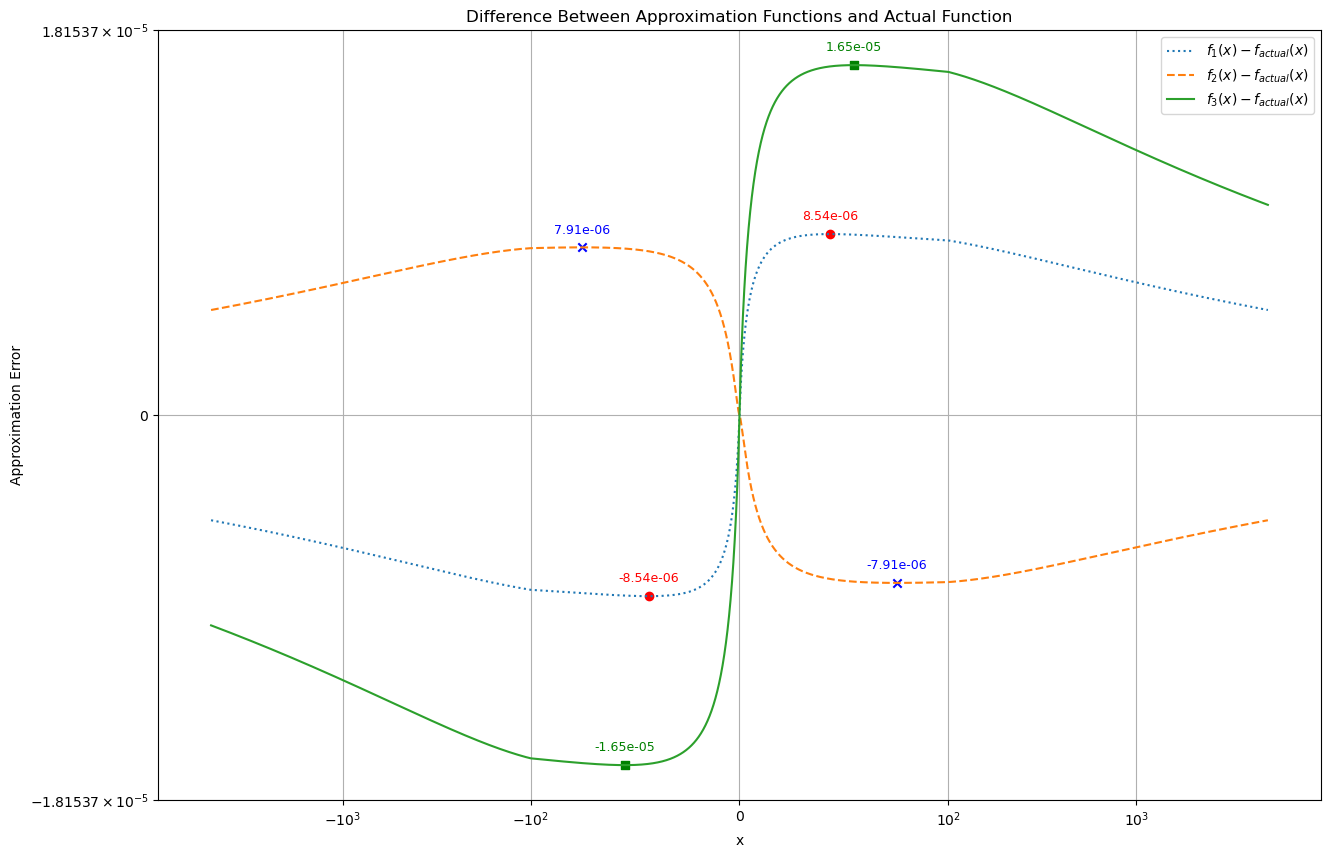

Critical points for f1 (x, diff): [(-43.37521687608478, -8.536918359163415e-06), (43.32521662608269, 8.536918200294404e-06)]
Critical points for f2 (x, diff): [(-75.47537737688708, 7.910985637449991e-06), (75.425377126885, -7.910985786684782e-06)]
Critical points for f3 (x, diff): [(-54.92527462637372, -1.6503356493582227e-05), (54.875274376371635, 1.6503355819949203e-05)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852 * (0.001**1.852)

# Define the approximation functions
def f_1(x, p):
    return (0.001**1.852) * x * (np.abs(x) + 1000 * p)**0.852 - (0.002368316 * p * x) / (np.abs(x) + 1000 * p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + 1000 * p)**0.852 * (np.abs(x) * (0.001**1.852)) / (np.abs(x) + 852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.175255362 * p**2 * x) / (np.abs(x) + 1000 * p)**1.148

def f_4(x, p):
    return  (0.001**1.852) * x * (np.abs(x)+ 148*p) / (np.abs(x) + 1000 * p)**0.148

# Generate x values
x_values = np.linspace(-5000, 5000, 200000)
p = 1e-2  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = f_1_values - f_actual_values
diff_2 = f_2_values - f_actual_values
diff_3 = f_3_values - f_actual_values

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='red', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='red')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='blue', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='green', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='green')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e+2)
plt.yscale('symlog', linthresh=1e-1)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))


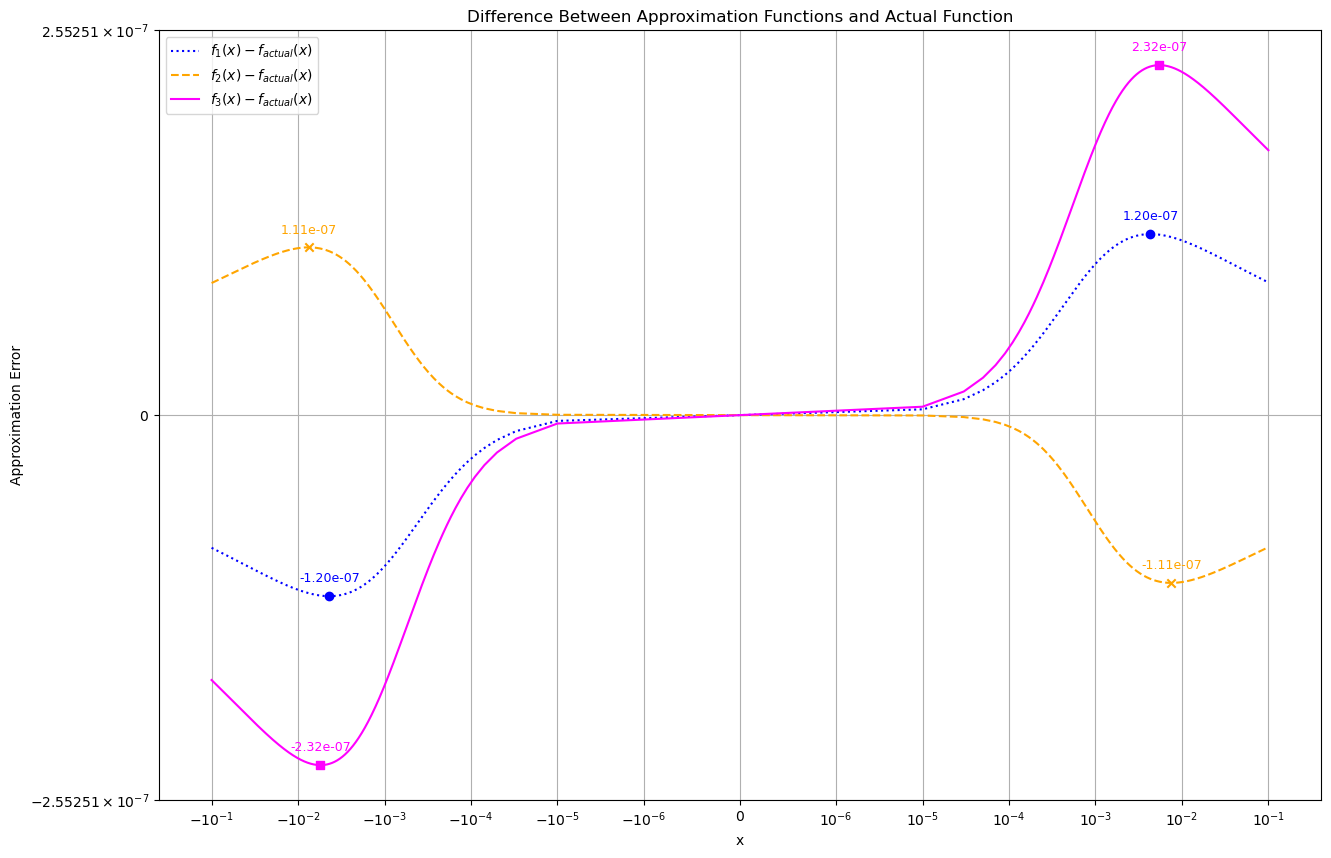

Critical points for f1 (x, diff): [(-0.004350435043504353, -1.2003404771745052e-07), (0.004330433043304327, 1.2003412033080682e-07)]
Critical points for f2 (x, diff): [(-0.007550755075507551, 1.1123221288613988e-07), (0.007530753075307525, -1.112321988090215e-07)]
Critical points for f3 (x, diff): [(-0.00551055105510552, -2.3204610494414275e-07), (0.005490549054905494, 2.320462662736293e-07)]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    return   x * (np.abs(x)+ 0.148*p) / (np.abs(x) + p)**0.148

# Generate x values
x_values = np.linspace(-0.1,0.1, 10000)
p = 1e-3  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
# diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
# diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
# diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))

diff_1 = (f_1_values - f_actual_values)
diff_2 = (f_2_values - f_actual_values)
diff_3 = (f_3_values - f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$f_1(x) - f_{actual}(x)$', linestyle='dotted',color='blue')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)$', linestyle='dashed',color='orange')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)$', linestyle='solid',color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-6)
plt.yscale('symlog', linthresh=1e-1)

# Labels and legen.01id
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))


/tmp/ipykernel_458418/2313036976.py:33: RuntimeWarning: invalid value encountered in divide
  diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
/tmp/ipykernel_458418/2313036976.py:34: RuntimeWarning: invalid value encountered in divide
  diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
/tmp/ipykernel_458418/2313036976.py:35: RuntimeWarning: invalid value encountered in divide
  diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))


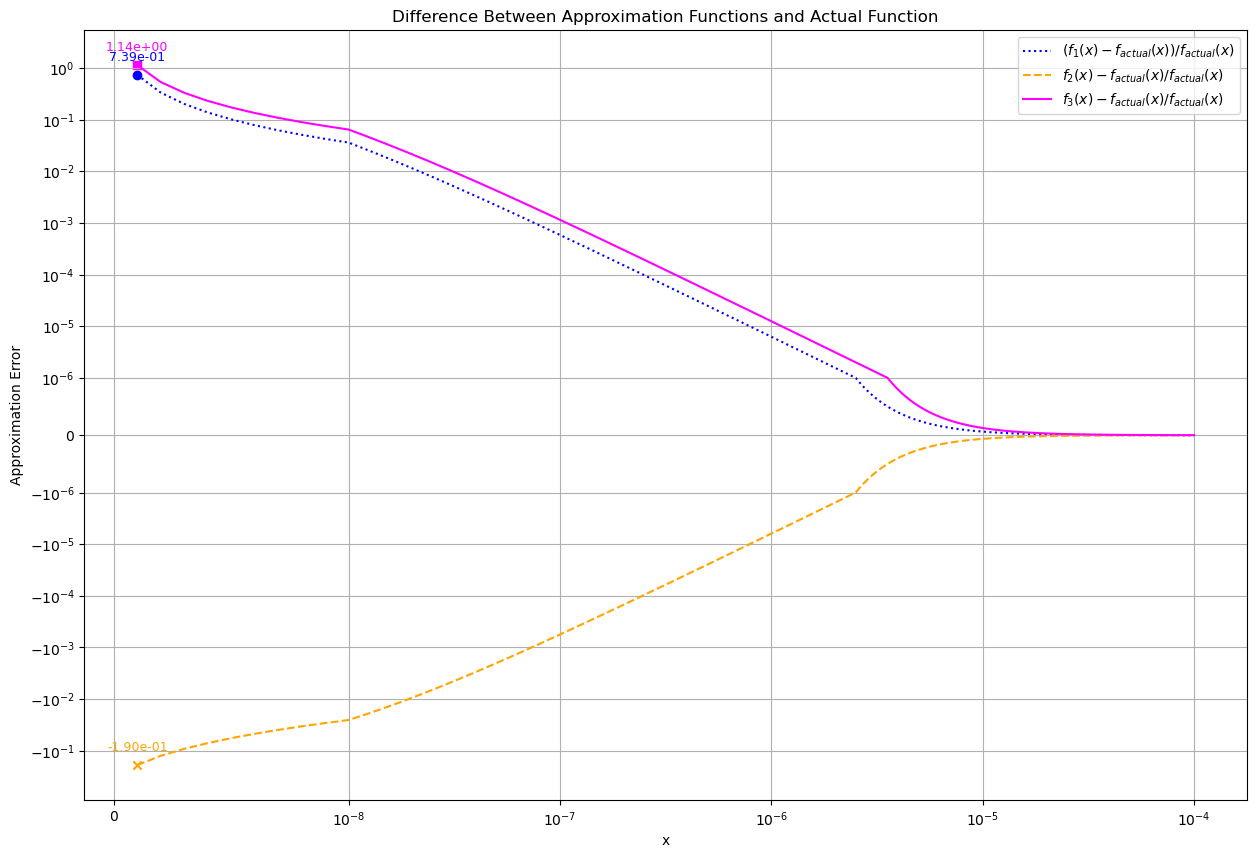

Critical points for f1 (x, diff): [(0.0, nan), (1.0000100001000011e-09, 0.739095999156344)]
Critical points for f2 (x, diff): [(0.0, nan), (1.0000100001000011e-09, -0.18972928592769686)]
Critical points for f3 (x, diff): [(0.0, nan), (1.0000100001000011e-09, 1.1410240884155982)]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    return   x * (np.abs(x)+ 0.148*p) / (np.abs(x) + p)**0.148

# Generate x values
a = 0.0001
x_values = np.linspace(0,a, 100000)
p = 1e-8  # Small positive value to avoid division issues

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values)/(np.abs(f_actual_values))
diff_2 = (f_2_values - f_actual_values)/(np.abs(f_actual_values))
diff_3 = (f_3_values - f_actual_values)/(np.abs(f_actual_values))

# diff_1 = (f_1_values - f_actual_values)
# diff_2 = (f_2_values - f_actual_values)
# diff_3 = (f_3_values - f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(15, 10))
plt.plot(x_values, diff_1, label=r'$(f_1(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dotted',color='blue')
plt.plot(x_values, diff_2, label=r'$f_2(x) - f_{actual}(x)/f_{actual}(x)$', linestyle='dashed',color='orange')
plt.plot(x_values, diff_3, label=r'$f_3(x) - f_{actual}(x)/f_{actual}(x)$', linestyle='solid',color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Use symmetric log scale for better visualization
plt.xscale('symlog', linthresh=1e-8)
plt.yscale('symlog', linthresh=1e-6)

# Labels and legen.01id
plt.xlabel('x')
plt.ylabel('Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

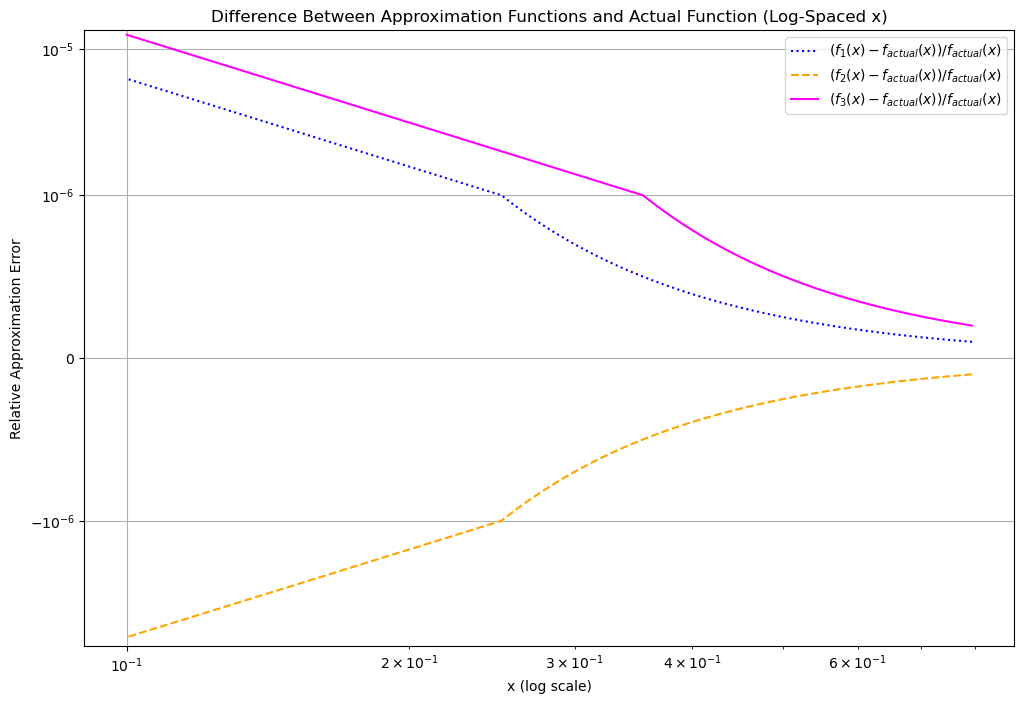

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

# Generate x values (logarithmic scale)
x_values = np.logspace(-1e-1, -1, 1000)  # Log-spaced values from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_3(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) / np.abs(f_actual_values)
diff_2 = (f_2_values - f_actual_values) / np.abs(f_actual_values)
diff_3 = (f_3_values - f_actual_values) / np.abs(f_actual_values)

# Plot the differences
plt.figure(figsize=(12, 8))
plt.plot(x_values, diff_1, label=r'$(f_1(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$(f_2(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$(f_3(x) - f_{actual}(x))/f_{actual}(x)$', linestyle='solid', color='magenta')

# Log scale for x and y
plt.xscale('log')
plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (log scale)')
plt.ylabel('Relative Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Log-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

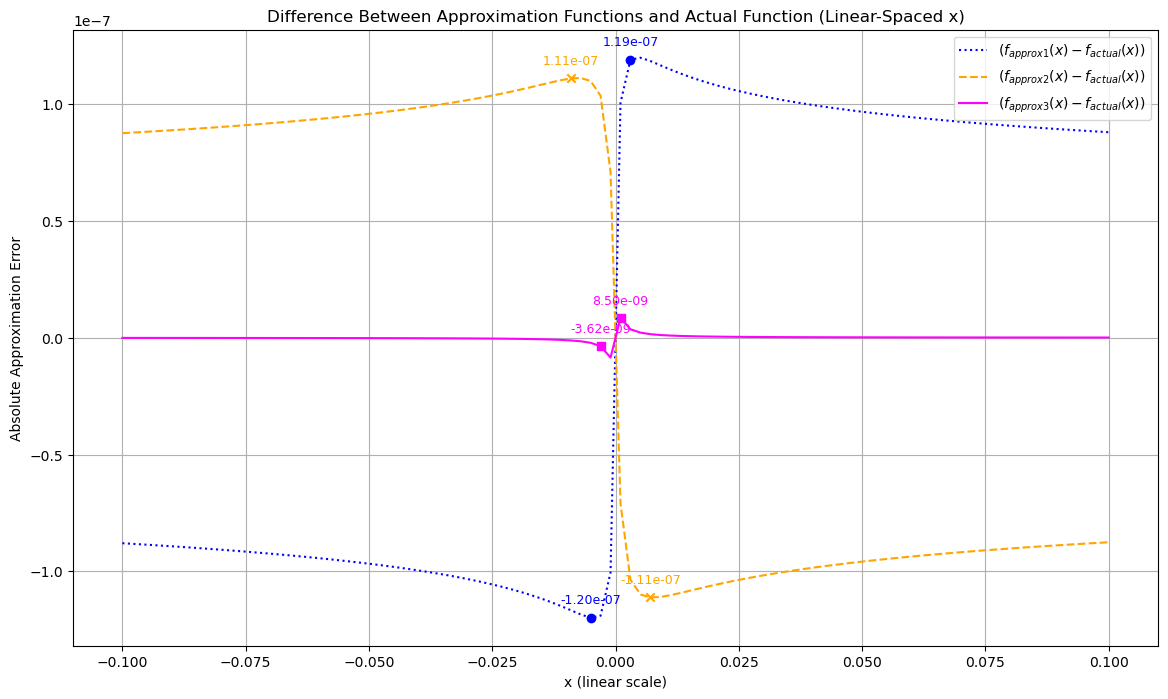

Critical points for f1 (x, diff): [(-0.005050505050505055, -1.198664771386997e-07), (0.003030303030303022, 1.190004984282166e-07)]
Critical points for f2 (x, diff): [(-0.009090909090909094, 1.1098592902662264e-07), (0.007070707070707061, -1.1120048818157079e-07)]
Critical points for f3 (x, diff): [(-0.003030303030303036, -3.617931444189359e-09), (0.0010101010101010027, 8.49520228619609e-09)]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    # return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x)+p)**0.148)
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / ((np.abs(x) + p)**2 - 1.148*p*(np.abs(x)+0.852*p))
    # return ((x*((np.abs(x) + 0.574*p)**2) + 1.392524 * p**2 * x)*(np.abs(x) + p)**0.852) /((np.abs(x) + p)**2 - 1.148*p*(np.abs(x) + 0.852*p))

# Generate x values (linear spacing)
x_values = np.linspace(-1e-1, 1e-1, 100)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_4(x_values, p)

# Compute differences
diff_1 = (f_1_values - f_actual_values) 
diff_2 = (f_2_values - f_actual_values) 
diff_3 = (f_3_values - f_actual_values) 

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$(f_{approx1}(x) - f_{actual}(x))$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$(f_{approx2}(x) - f_{actual}(x))$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$(f_{approx3}(x) - f_{actual}(x))$', linestyle='solid', color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Log scale for y, linear scale for x
# plt.xscale('linear')
# plt.xscale('symlog', linthresh=1e-3)
# plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Absolute Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))

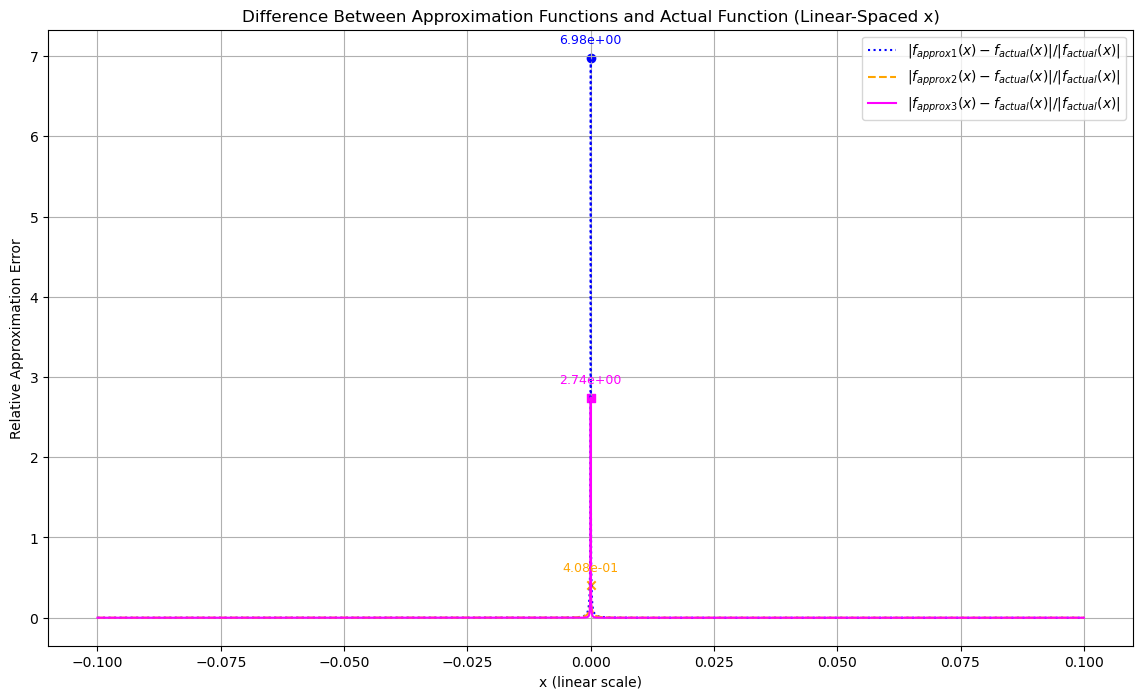

Critical points for f1 (x, diff): [(-1.0001000100012813e-05, 6.979638282744854)]
Critical points for f2 (x, diff): [(-1.0001000100012813e-05, 0.4081919953328202)]
Critical points for f3 (x, diff): [(-1.0001000100012813e-05, 2.744437104856933)]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original function
def f_actual(x):
    return x * np.abs(x)**0.852

# Define the approximation functions
def f_1(x, p):
    # return x * (np.abs(x) +  p)**0.852 - (0.852 * p * x) / (np.abs(x) + p)**0.148
    return x * (np.abs(x) + 0.148*p) / (np.abs(x) + p)**0.148

def f_2(x, p):
    return x * (np.abs(x) + p)**0.852 * np.abs(x) / (np.abs(x) + 0.852 * p)

def f_3(x, p):
    return f_1(x, p) + (0.063048 * p**2 * x) / (np.abs(x) + p)**1.148

def f_4(x, p):
    # return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148 - 1.148*p*(np.abs(x)+p)**0.148)
    return f_2(x, p) + (0.063048 * p**2 * x) / ((np.abs(x) + p)**1.148)
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / ((np.abs(x) + p)**2 - 1.148*p*(np.abs(x)+0.852*p))
    # return f_2(x, p) + (0.063048 * p**2 * x)*((np.abs(x) + p)**0.852) / np.abs(x)*(np.abs(x) + 0.852*p)
    # return ((x*((np.abs(x) + 0.574*p)**2) + 1.392524 * p**2 * x)*(np.abs(x) + p)**0.852) /((np.abs(x) + p)**2 - 1.148*p*(np.abs(x) + 0.852*p))

# Generate x values (linear spacing)
x_values = np.linspace(-1e-1, 1e-1, 10000)  # Linear spacing from 10⁻⁶ to 10⁻²
p = 1e-3  # Small positive value

# x_values = np.linspace(-1e-2, 1e-2, 10000)  # Linear spacing from 10⁻⁶ to 10⁻²
# p = 1e-2  # Small positive value


# Compute function values
f_actual_values = f_actual(x_values)
f_1_values = f_1(x_values, p)
f_2_values = f_2(x_values, p)
f_3_values = f_4(x_values, p)

# Compute differences
diff_1 = np.abs(f_1_values - f_actual_values) / np.abs(f_actual_values)
diff_2 = np.abs(f_2_values - f_actual_values) / np.abs(f_actual_values)
diff_3 = np.abs(f_3_values - f_actual_values) / np.abs(f_actual_values)

# Compute numerical derivatives
grad_diff_1 = np.gradient(diff_1, x_values)
grad_diff_2 = np.gradient(diff_2, x_values)
grad_diff_3 = np.gradient(diff_3, x_values)

# Find critical points where the derivative changes sign
def find_critical_points(grad_diff, x_values, diff_values):
    sign_change = np.where(np.diff(np.sign(grad_diff)))[0]
    x_crit = x_values[sign_change]
    y_crit = diff_values[sign_change]
    return x_crit, y_crit

critical_x1, critical_y1 = find_critical_points(grad_diff_1, x_values, diff_1)
critical_x2, critical_y2 = find_critical_points(grad_diff_2, x_values, diff_2)
critical_x3, critical_y3 = find_critical_points(grad_diff_3, x_values, diff_3)

# Plot the differences
plt.figure(figsize=(14, 8))
plt.plot(x_values, diff_1, label=r'$|f_{approx1}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dotted', color='blue')
plt.plot(x_values, diff_2, label=r'$|f_{approx2}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='dashed', color='orange')
plt.plot(x_values, diff_3, label=r'$|f_{approx3}(x) - f_{actual}(x)|/|f_{actual}(x)|$', linestyle='solid', color='magenta')

# Highlight and annotate critical points
for x, y in zip(critical_x1, critical_y1):
    plt.scatter(x, y, color='blue', marker='o')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

for x, y in zip(critical_x2, critical_y2):
    plt.scatter(x, y, color='orange', marker='x')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='orange')

for x, y in zip(critical_x3, critical_y3):
    plt.scatter(x, y, color='magenta', marker='s')
    plt.annotate(f"{y:.2e}", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='magenta')

# Log scale for y, linear scale for x
# plt.xscale('linear')
# plt.xscale('symlog', linthresh=1e-3)
# plt.yscale('symlog', linthresh=1e-6)

# Labels and legend
plt.xlabel('x (linear scale)')
plt.ylabel('Relative Approximation Error')
plt.title('Difference Between Approximation Functions and Actual Function (Linear-Spaced x)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print critical points
print("Critical points for f1 (x, diff):", list(zip(critical_x1, critical_y1)))
print("Critical points for f2 (x, diff):", list(zip(critical_x2, critical_y2)))
print("Critical points for f3 (x, diff):", list(zip(critical_x3, critical_y3)))